In [124]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.stats import bernoulli, binom
from scipy.stats import norm

In [66]:
#Reading the DataFrame
df = pd.read_csv('volly_pnl',index_col=0)

#Converting Index to datetime
df.index = pd.to_datetime(df.index)

#Show dataframe head
df

,btc_close,pnl
time,,
2019-10-14,8363.94,0.0
2019-10-15,8173.48,1.0
2019-10-16,8014.39,2.0
2019-10-17,8082.46,1.0
2019-10-18,7972.62,0.0
...,...,...
2021-02-21,57469.95,-10.0
2021-02-22,54121.17,-9.0
2021-02-23,48898.70,-8.0


## 2 Questions
You are given a file containing the following columns: (1) Time; (2) BTC/USDT price; (3) Volly’s aggregate PNL.

### 1. Load the provided file and visualize the following elements:

#### (a) Price series: BTC/USDT price vs. time

Text(0.5, 1.0, 'Price Series')

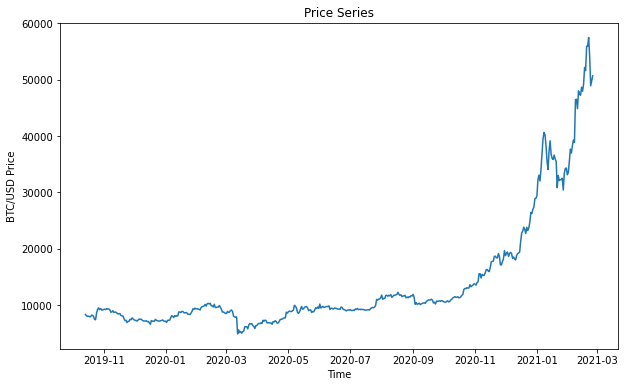

In [67]:
#Plot btc_close v/s time
plt.figure(figsize=(10,6))
plt.plot(df.index,df['btc_close'])
plt.xlabel('Time')
plt.ylabel('BTC/USD Price')
plt.title('Price Series')

### (b) Returns series: use arithmetic returns as opposed to geometric.

Text(0, 0.5, 'Returns')

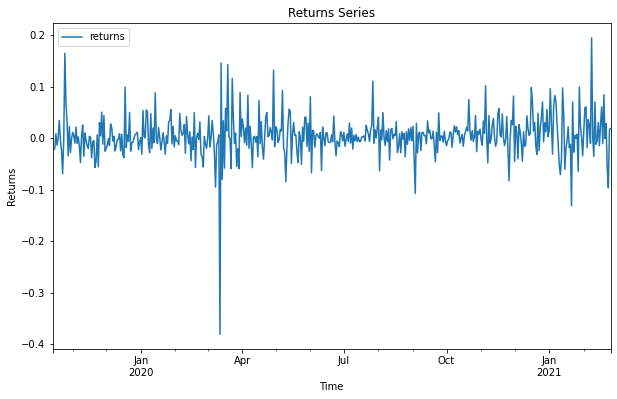

In [68]:
df['returns'] = df['btc_close'].pct_change()
df.plot(y='returns',figsize=(10,6))
plt.title('Returns Series')
plt.xlabel('Time')
plt.ylabel('Returns')

### (c) PNL series vs time.

Text(0, 0.5, 'PNL')

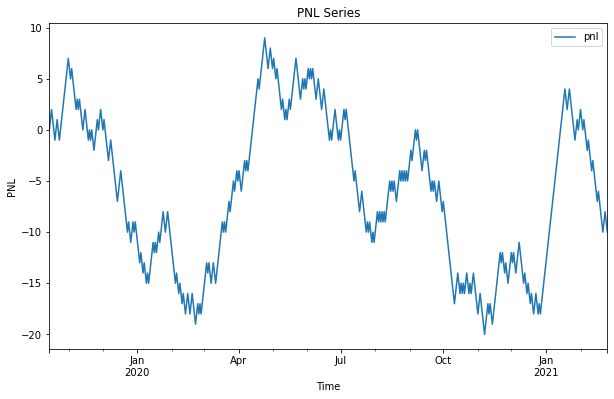

In [69]:
df.plot(y='pnl',figsize=(10,6))
plt.title('PNL Series')
plt.xlabel('Time')
plt.ylabel('PNL')

### (d) Daily output series $O_t$.

Text(0, 0.5, 'Output')

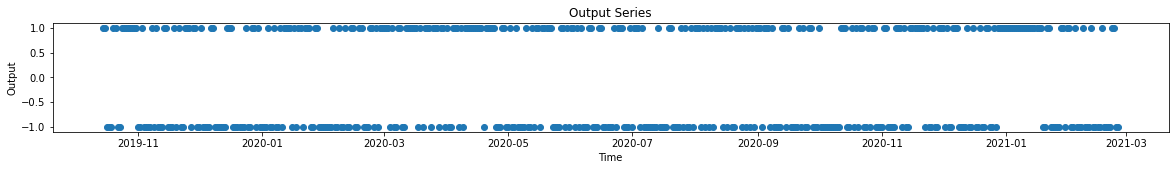

In [112]:
df['output'] = df['pnl'] - df['pnl'].shift(1)
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(2)
plt.scatter(df.index,df['output'])
plt.title('Output Series')
plt.xlabel('Time')
plt.ylabel('Output')

## 2. Given returns $R_t$ and daily algorithm output $O_t$, propose a methodology to estimate the following parameters:$ λ = \{α, θ_L, θ_H \}$. Formulate a reasonable objective function.

In [114]:
df['abs_ret'] = abs(df['returns'])
df['abs_ret'].describe()

count    500.000000
mean       0.025948
std        0.031236
min        0.000127
25%        0.007066
50%        0.015816
75%        0.034128
max        0.381176
Name: abs_ret, dtype: float64

In [133]:
norm.ppf(0.95)*df['abs_ret'].std() - df['abs_ret'].mean()

0.025430160864583825

### We can assume 2% to be a suitable value for the a threshold to divide the returns into high and low volatility regimes.

In [135]:
def get_params(df, alpha):
    high_vol = df.loc[df['abs_ret'] > alpha].shape[0]
    low_vol = df.loc[df['abs_ret'] <= alpha].shape[0]
    win_high= df.loc[(df['abs_ret'] > alpha) & (df['output'] > 0)].shape[0]
    loose_high = df.loc[(df['abs_ret'] > alpha) & (df['output'] < 0)].shape[0]
    win_low = df.loc[(df['abs_ret'] <= alpha) & (df['output'] > 0)].shape[0]
    loose_low = df.loc[(df['abs_ret'] <= alpha) & (df['output'] < 0)].shape[0]
    theta_high = win_high / high_vol
    theta_low = win_low / low_vol
    return round(theta_high,4), round(theta_low,4)

In [136]:
print("Alpha = 0.02")
print("Theta High = ", get_params(df, 0.02)[0])
print("Theta Low = ", get_params(df, 0.02)[1])

Alpha = 0.02
Theta High =  0.6368
Theta Low =  0.3819
